In [1]:
library(haven)
library(tidyverse)
library(broom)
library(lme4) 
library(latex2exp)
library(gridExtra)
#library(ggforce)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
AA_Sex_1 <- read_sav("~/Documents/AA-leche-humana/datos/AMINOACIDOS POR SEXO_1.sav")
head(AA_Sex_1) 

ID,GROUP,MATERNALAGE,SEXO,INFANTDOB,MATBMI1COLL,MATBMI215d,MATBMI32mos,MATBMI44mos,BABYWeigth1g,⋯,ALAGLOB,ASNGLOB,SYSGLOB,GLYGLOB,GLUGLOB,GLNGLOB,PROLINEGLOB,SERINEGLOB,TYRAMINEGLOB,new
<dbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,17,1,2009-08-20,25,24,24,22,3492.7,⋯,21.25,0.5,1.00,10.00,87.25,23.25,2.75,8.0,1.00,0
2,0,16,2,2009-08-24,32,31,30,29,3392.9,⋯,18.25,0.0,0.75,13.75,100.50,40.50,2.50,9.5,0.75,0
3,0,17,2,2009-08-21,23,23,NA,NA,2993.8,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
4,0,16,2,2009-08-21,26,NA,NA,NA,3692.3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
5,0,16,NA,2009-08-29,25,NA,NA,NA,3592.5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
6,0,16,2,2009-08-27,29,28,30,31,3093.5,⋯,15.50,0.5,1.50,10.25,74.75,30.00,5.25,8.0,2.00,0


In [3]:
AA_E <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 62:97) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 


names(AA_E)

[1] "id"            "group"         "age"           "sex"          
 [5] "HISCalostrum"  "HISTransition" "HISMature2m"   "HISMature4m"  
 [9] "ILECalostrum"  "ILETransition" "ILEMature2m"   "ILEMature4m"  
[13] "LEUCalostrum"  "LEUTransition" "LEUMature2m"   "LEUMature4m"  
[17] "LYSCalostrum"  "LYSTransition" "LYSMature2m"   "LYSMature4m"  
[21] "METCalostrum"  "METTransition" "METMature2m"   "METMature4m"  
[25] "PHECalostrum"  "PHETransition" "PHEMature2m"   "PHEMature4m"  
[29] "THRCalostrum"  "THRTransition" "THRMature2m"   "THRMature4m"  
[33] "TRPCalostrum"  "TRPTransition" "TRPMature2m"   "TRPMature4m"  
[37] "VALCalostrum"  "VALTransition" "VALMature2m"   "VALMature4m"

In [4]:
AA_NE <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 58:61, 102:141) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 

names(AA_NE)

[1] "id"            "group"         "age"           "sex"          
 [5] "ARGCalostrum"  "ARGTransition" "ARGMature2m"   "ARGMature4m"  
 [9] "ASPCalostrum"  "ASPTransition" "ASPMature2m"   "ASPMature4m"  
[13] "ALACalostrum"  "ALATransition" "ALAMature2m"   "ALAMature4m"  
[17] "ASNCalostrum"  "ASNTransition" "ASNMature2m"   "ASNMature4m"  
[21] "CYSCalostrum"  "CYSTransition" "CYSMature2m"   "CYSMature4m"  
[25] "GLYCalostrum"  "GLYTransition" "GLYMature2m"   "GLYMature4m"  
[29] "GLUCalostrum"  "GLUTransition" "GLUMature2m"   "GLUMature4m"  
[33] "GLNCalostrum"  "GLNTransition" "GLNMature2m"   "GLNMature4m"  
[37] "PROCalostrum"  "PROTransition" "PROMature2m"   "PROMature4m"  
[41] "SERCalostrum"  "SERTransition" "SERMature2m"   "SERMature4m"  
[45] "TYRCalostrum"  "TYRTransition" "TYRMature2m"   "TYRMature4m"

In [5]:
# Removing NAs
AA_E_Long <- AA_E %>% gather(weekNames, level, 5:length(names(AA_E))) 
AA_NE_Long <- AA_NE %>% gather(weekNames, level, 5:length(names(AA_NE))) 

head(AA_E_Long)

Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measure variables;
they will be dropped"

id,group,age,sex,weekNames,level
<fct>,<fct>,<dbl>,<fct>,<chr>,<dbl>
1,teen,17,girl,HISCalostrum,2
2,teen,16,boy,HISCalostrum,1
3,teen,17,boy,HISCalostrum,2
4,teen,16,boy,HISCalostrum,1
5,teen,16,NA,HISCalostrum,1
6,teen,16,boy,HISCalostrum,1


In [6]:
AA_E_Long <- 
    AA_E_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_E_Long <- 
    AA_E_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_E_Long)

id,group,age,sex,weekNames,level,week,AA
<fct>,<fct>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<chr>
1,teen,17,girl,HISCalostrum,2,1,HIS
2,teen,16,boy,HISCalostrum,1,1,HIS
3,teen,17,boy,HISCalostrum,2,1,HIS
4,teen,16,boy,HISCalostrum,1,1,HIS
5,teen,16,NA,HISCalostrum,1,1,HIS
6,teen,16,boy,HISCalostrum,1,1,HIS


In [7]:
AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_NE_Long)

id,group,age,sex,weekNames,level,week,AA
<fct>,<fct>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<chr>
1,teen,17,girl,ARGCalostrum,1,1,ARG
2,teen,16,boy,ARGCalostrum,1,1,ARG
3,teen,17,boy,ARGCalostrum,1,1,ARG
4,teen,16,boy,ARGCalostrum,1,1,ARG
5,teen,16,NA,ARGCalostrum,2,1,ARG
6,teen,16,boy,ARGCalostrum,2,1,ARG


In [8]:
write.csv(AA_E_Long, './datos/AA_E_Long.csv')
write.csv(AA_NE_Long, './datos/AA_NE_Long.csv')

## Weight and size of babies

In [9]:
names(AA_Sex_1)

[1] "ID"                       "GROUP"                   
  [3] "MATERNALAGE"              "SEXO"                    
  [5] "INFANTDOB"                "MATBMI1COLL"             
  [7] "MATBMI215d"               "MATBMI32mos"             
  [9] "MATBMI44mos"              "BABYWeigth1g"            
 [11] "BABYWeigth2g"             "BABYWeigth3g"            
 [13] "BABYWeigth4g"             "HeadCircumcm1"           
 [15] "HCcm2"                    "HCcm3"                   
 [17] "HCcm4"                    "MATHeight1m"             
 [19] "MATHeight2m"              "MATHeight3m"             
 [21] "MATHeight4m"              "MATWeight1kg"            
 [23] "MATWeight2kg"             "MATWeight3kg"            
 [25] "MATWeight4kg"             "A.TOTALCALORIESKcal"     
 [27] "B.TOTALCALORIESKcal"      "A.PROTEINg"              
 [29] "B.PROTEINg"               "A.CHOg"                  
 [31] "B.CHOg"                   "A.LIPIDSg"               
 [33] "B.LIPIDSg"                "A.GLUCOSEmgdL"           
 [35] "B.GLUCOSEmgdL"            "A.CHOLESTEROLmgdL"       
 [37] "B.CHOLESTEROLmgdL"        "A.TRIGLYCERIDSmgdL"      
 [39] "B.TRIGLYCERIDmgdL"        "A.HDLmgdL"               
 [41] "B.HDLmgdL"                "A.LDLmgdL"               
 [43] "B.LDLmgdL"                "A.PROTEINSgdL"           
 [45] "B.PROTEINSgdL"            "A.ALBUMINgdL"            
 [47] "B.ALBUMINgdL"             "edadr"                   
 [49] "Grupos"                   "CALOSTRUMtotalAA"        
 [51] "TRANSITIONtotalAA"        "MATURE2mtotalAA"         
 [53] "MATURE4mtotalAA"          "CALOSTRUMessentialAA"    
 [55] "TRANSITIONessentialAA"    "MATURE2messentialAA"     
 [57] "MATURE4messentialAA"      "ARGCalostrum"            
 [59] "ARGTransition"            "ARGMature2m"             
 [61] "ARGMature4m"              "HISCalostrum"            
 [63] "HISTransition"            "HISMature2m"             
 [65] "HISMature4m"              "ILECalostrum"            
 [67] "ILETransition"            "ILEMature2m"             
 [69] "ILEMature4m"              "LEUCalostrum"            
 [71] "LEUTransition"            "LEUMature2m"             
 [73] "LEUMature4m"              "LYSCalostrum"            
 [75] "LYSTransition"            "LYSMature2m"             
 [77] "LYSMature4m"              "METCalostrum"            
 [79] "METTransition"            "METMature2m"             
 [81] "METMature4m"              "PHECalostrum"            
 [83] "PHETransition"            "PHEMature2m"             
 [85] "PHEMature4m"              "THRCalostrum"            
 [87] "THRTransition"            "THRMature2m"             
 [89] "THRMature4m"              "TRPCalostrum"            
 [91] "TRPTransition"            "TRPMature2m"             
 [93] "TRPMature4m"              "VALCalostrum"            
 [95] "VALTransition"            "VALMature2m"             
 [97] "VALMature4m"              "CALOSTRUMnonessentialAA" 
 [99] "TRANSITIONnonessentialAA" "MATURE2mnonessentialAA"  
[101] "MATURE4mnonessentialAA"   "ASPCalostrum"            
[103] "ASPTransition"            "ASPMature2m"             
[105] "ASPMature4m"              "ALACalostrum"            
[107] "ALATransition"            "ALAMature2m"             
[109] "ALAMature4m"              "ASNCalostrum"            
[111] "ASNTransition"            "ASNMature2m"             
[113] "ASNMature4m"              "CYSCalostrum"            
[115] "CYSTransition"            "CYSMature2m"             
[117] "CYSMature4m"              "GLYCalostrum"            
[119] "GLYTransition"            "GLYMature2m"             
[121] "GLYMature4m"              "GLUCalostrum"            
[123] "GLUTransition"            "GLUMature2m"             
[125] "GLUMature4m"              "GLNCalostrum"            
[127] "GLNTransition"            "GLNMature2m"             
[129] "GLNMature4m"              "PROCalostrum"            
[131] "PROTransition"            "PROMature2m"             
[133] "PROMature4m"              "SERCalos

In [10]:
#names(AA_Sex_1)
moms <- AA_Sex_1 %>% select(id = ID, group = GROUP, momAge = MATERNALAGE, sex = SEXO, 
                            momHeight = MATHeight1m, momWeight = MATWeight1kg) %>%
                     mutate(id = factor(id), 
                            sex =  factor(sex, labels = c('girl', 'boy')),
                            group = factor(group, labels = c('teen', 'adult')),
                            BMI = round(momWeight / (momHeight)^2, 2))

names(moms)
head(moms)

[1] "id"        "group"     "momAge"    "sex"       "momHeight" "momWeight"
[7] "BMI"

id,group,momAge,sex,momHeight,momWeight,BMI
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,teen,17,girl,1.48,54.4,24.84
2,teen,16,boy,1.52,74.7,32.33
3,teen,17,boy,1.55,56.4,23.48
4,teen,16,boy,1.60,65.9,25.74
5,teen,16,NA,1.51,56.5,24.78
6,teen,16,boy,1.57,71.2,28.89


In [11]:
moms %>% group_by(group) %>%   
    summarise(meanHeight = round(mean(momHeight, na.rm = T), 1),
              sdHeight = round(sd(momHeight, na.rm = T), 1),
              meanWeight = round(mean(momWeight, na.rm = T), 1),
              sdWeight = round(sd(momWeight, na.rm = T), 1),
              meanAge = round(mean(momAge), 1), 
              sdAge = round(sd(momAge), 1), 
              meanBMI = round(mean(momAge, na.rm = T), 1), 
              sdBMI = round(sd(momAge, na.rm = T), 1)) 

group,meanHeight,sdHeight,meanWeight,sdWeight,meanAge,sdAge,meanBMI,sdBMI
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
teen,1.5,0.1,59.5,8.2,16.4,1.0,16.4,1.0
adult,1.6,0.1,59.4,9.5,21.3,2.4,21.3,2.4


In [12]:
weight <- AA_Sex_1 %>% select(id = ID, group = GROUP, sex = SEXO, 10:13) %>% 
                        mutate(id = factor(id), 
                               sex =  factor(sex, labels = c('girl', 'boy')),
                               group = factor(group, labels = c('teen', 'adult')))

headC <- AA_Sex_1 %>% select(id = ID, group = GROUP, sex = SEXO, 14:17) %>% 
                        mutate(id = factor(id), 
                               sex =  factor(sex, labels = c('girl', 'boy')),
                               group = factor(group, labels = c('teen', 'adult')))


head(headC)

id,group,sex,HeadCircumcm1,HCcm2,HCcm3,HCcm4
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,teen,girl,34,37,39,42
2,teen,boy,35,37,38,41
3,teen,boy,35,37,NA,NA
4,teen,boy,37,NA,NA,NA
5,teen,NA,34,NA,NA,NA
6,teen,boy,35,36,39,44


In [13]:
weight %>% group_by(group) %>% summarise(n())

group,n()
<fct>,<int>
teen,39
adult,26


In [14]:
weight %>% group_by(sex) %>% summarise(n())

Warning message:
"Factor `sex` contains implicit NA, consider using `forcats::fct_explicit_na`"

sex,n()
<fct>,<int>
girl,26
boy,35
NA,4


In [15]:
weight %>% group_by(sex) %>% 
    summarise(meanWeight = round(mean(BABYWeigth1g/1000, na.rm = T), 2), 
              sdWeight = round(sd(BABYWeigth1g/1000, na.rm = T), 2))

Warning message:
"Factor `sex` contains implicit NA, consider using `forcats::fct_explicit_na`"

sex,meanWeight,sdWeight
<fct>,<dbl>,<dbl>
girl,3.45,0.78
boy,3.16,0.43
NA,3.36,0.32


In [16]:
headC %>% group_by(sex) %>% 
    summarise(meanWeight = round(mean(HeadCircumcm1, na.rm = T), 2), 
              sdWeight = round(sd(HeadCircumcm1, na.rm = T), 2))

Warning message:
"Factor `sex` contains implicit NA, consider using `forcats::fct_explicit_na`"

sex,meanWeight,sdWeight
<fct>,<dbl>,<dbl>
girl,33.53,0.87
boy,33.88,1.36
NA,33.67,0.58


In [17]:
weightLong <- weight %>% gather(weekNames, weight, -id, -group, -sex)
headCLong <- headC %>% gather(weekNames, head, -id, -group, -sex)

weightLong %>% filter(id == 4)
headCLong %>% filter(id == 4)

Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measure variables;
they will be dropped"

id,group,sex,weekNames,weight
<fct>,<fct>,<fct>,<chr>,<dbl>
4,teen,boy,BABYWeigth1g,3692.3
4,teen,boy,BABYWeigth2g,NA
4,teen,boy,BABYWeigth3g,NA
4,teen,boy,BABYWeigth4g,NA


id,group,sex,weekNames,head
<fct>,<fct>,<fct>,<chr>,<dbl>
4,teen,boy,HeadCircumcm1,37
4,teen,boy,HCcm2,NA
4,teen,boy,HCcm3,NA
4,teen,boy,HCcm4,NA


In [18]:
weightLong <- 
    weightLong %>% 
        mutate(week = gsub(".*1g", "1", weekNames)) %>%
        mutate(week = gsub(".*2g", "2", week)) %>%
        mutate(week = gsub(".*3g", "8", week)) %>%
        mutate(week = gsub(".*4g", "16", week)) %>% 
        mutate(week = as.numeric(week))

weightLong %>% filter(id == 1)

id,group,sex,weekNames,weight,week
<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
1,teen,girl,BABYWeigth1g,3492.70,1
1,teen,girl,BABYWeigth2g,3592.50,2
1,teen,girl,BABYWeigth3g,5488.60,8
1,teen,girl,BABYWeigth4g,8282.74,16


In [19]:
headCLong <- 
    headCLong %>% 
        mutate(week = gsub(".*cm1", "1", weekNames)) %>%
        mutate(week = gsub(".*cm2", "2", week)) %>%
        mutate(week = gsub(".*cm3", "8", week)) %>%
        mutate(week = gsub(".*cm4", "16", week)) %>% 
        mutate(week = as.numeric(week))

headCLong %>% filter(id == 1)

id,group,sex,weekNames,head,week
<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
1,teen,girl,HeadCircumcm1,34,1
1,teen,girl,HCcm2,37,2
1,teen,girl,HCcm3,39,8
1,teen,girl,HCcm4,42,16


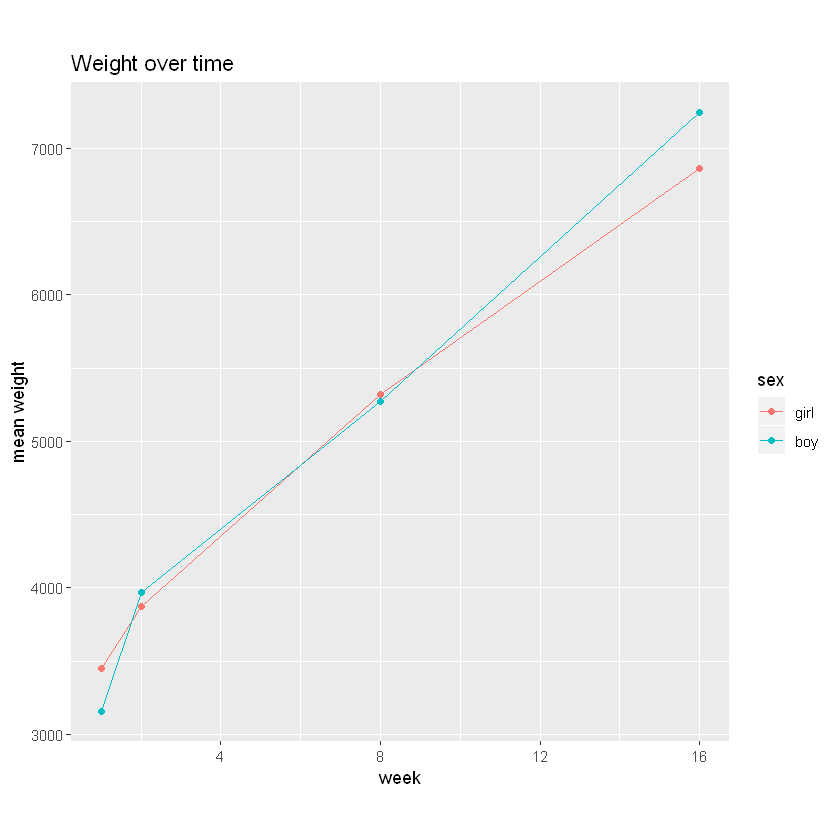

In [20]:
weightDist <- weightLong %>% filter(!is.na(sex)) %>% group_by(sex, week) %>% 
        summarise(mean = mean(weight, na.rm = T), sd = sd(weight, na.rm = T))

#png(filename="./plots/weight.png", units="cm", width=15, height=15, res = 300)
ggplot(weightDist, aes(x = week, y = mean, color = sex)) + 
    geom_point() + 
    #geom_linerange(aes(ymin = mean - 2*sd, ymax = mean + 2*sd)) + 
    geom_line() + #geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Weight over time') + ylab('mean weight')
#dev.off()

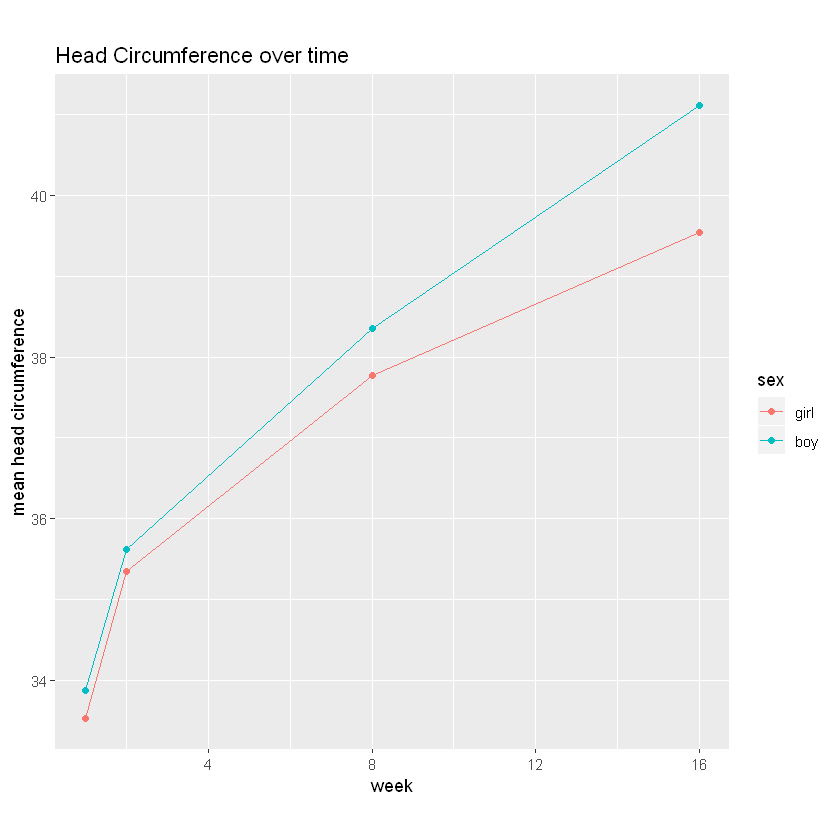

In [21]:
headCDist <- headCLong %>% filter(!is.na(sex)) %>% group_by(sex, week) %>% 
        summarise(mean = mean(head, na.rm = T), sd = sd(head, na.rm = T))

#png(filename="./plots/head_c.png", units="cm", width=15, height=15, res = 300)
ggplot(headCDist, aes(x = week, y = mean, color = sex)) + 
    geom_point() + 
    #geom_errorbar(aes(ymin = mean - 2*sd, ymax = mean + 2*sd), alpha = 0.5) + 
    geom_line() + #geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Head Circumference over time') + ylab('mean head circumference')
#dev.off()

In [22]:
summary(lm(weightDist, formula = mean ~ week + sex + week:sex))


Call:
lm(formula = mean ~ week + sex + week:sex, data = weightDist)

Residuals:
      1       2       3       4       5       6       7       8 
-142.77   58.29  165.70  -81.21 -279.17  276.06   40.34  -37.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3365.70     174.91  19.243  4.3e-05 ***
week          223.54      19.40  11.520 0.000324 ***
sexboy       -185.37     247.35  -0.749 0.495267    
week:sexboy    32.75      27.44   1.194 0.298597    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 231.8 on 4 degrees of freedom
Multiple R-squared:  0.9871,	Adjusted R-squared:  0.9775 
F-statistic: 102.4 on 3 and 4 DF,  p-value: 0.0003084


In [23]:
summary(lm(headCDist, formula = mean ~ week + sex + week:sex))


Call:
lm(formula = mean ~ week + sex + week:sex, data = headCDist)

Residuals:
      1       2       3       4       5       6       7       8 
-0.9137  0.5435  0.7621 -0.3919 -0.7740  0.5162  0.5478 -0.2901 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.07687    0.66572  51.188 8.72e-07 ***
week         0.36628    0.07385   4.959  0.00771 ** 
sexboy       0.12198    0.94147   0.130  0.90317    
week:sexboy  0.08387    0.10445   0.803  0.46700    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8824 on 4 degrees of freedom
Multiple R-squared:  0.9403,	Adjusted R-squared:  0.8955 
F-statistic: 20.99 on 3 and 4 DF,  p-value: 0.006556


In [24]:
weight %>% inner_join(headC, by = 'id') %>% select(contains('Weigth'), contains('cm')) %>% cor(use="complete.obs")

,BABYWeigth1g,BABYWeigth2g,BABYWeigth3g,BABYWeigth4g,HeadCircumcm1,HCcm2,HCcm3,HCcm4
BABYWeigth1g,1.0000000,0.18492505,0.6236000,0.3964243,0.52235889,0.5382875,0.5883136,0.19971893
BABYWeigth2g,0.1849250,1.00000000,0.3589664,0.2509749,0.07017043,0.2817560,0.1265833,-0.08215091
BABYWeigth3g,0.6236000,0.35896645,1.0000000,0.7727088,0.78427813,0.8303841,0.8158937,0.54844962
BABYWeigth4g,0.3964243,0.25097489,0.7727088,1.0000000,0.66359782,0.6963510,0.7417554,0.68986933
HeadCircumcm1,0.5223589,0.07017043,0.7842781,0.6635978,1.00000000,0.8338292,0.8214121,0.75736063
HCcm2,0.5382875,0.28175596,0.8303841,0.6963510,0.83382922,1.0000000,0.7285378,0.64730848
HCcm3,0.5883136,0.12658332,0.8158937,0.7417554,0.82141209,0.7285378,1.0000000,0.74281294
HCcm4,0.1997189,-0.08215091,0.5484496,0.6898693,0.75736063,0.6473085,0.7428129,1.00000000


## Weight and size of babies = Week?

In [25]:
headCDist
cor(weightDist[2:3])
cor(headCDist[2:3])

sex,week,mean,sd
<fct>,<dbl>,<dbl>,<dbl>
girl,1,33.52941,0.8744746
girl,2,35.35294,1.4116115
girl,8,37.76923,1.0919284
girl,16,39.54545,1.3684763
boy,1,33.87500,1.3619246
boy,2,35.61538,1.3587324
boy,8,38.34783,1.5553046
boy,16,41.11111,1.5676468


,week,mean
week,1.0000000,0.9911695
mean,0.9911695,1.0000000


,week,mean
week,1.0000000,0.9552353
mean,0.9552353,1.0000000


## Group and Free AA levels

In [26]:
AA_E %>% select(sex, group) %>% filter(!is.na(sex)) %>%
    group_by(sex, group) %>% summarise(number = n()) %>%
    spread(group, number)

sex,teen,adult
<fct>,<int>,<int>
girl,13,13
boy,24,11


In [27]:
table = table( AA_E %>% select(sex, group)) 
print(table)

      group
sex    teen adult
  girl   13    13
  boy    24    11


Teen mothers have almost twice the number of boys: 24 boys and 13 girls. Is there an assosiation between group and sex? 


$H_0:$ group and sex are independent.

In [28]:
print(chisq.test(table))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table
X-squared = 1.448, df = 1, p-value = 0.2288



$P(independence) \approx 0.23$ 

### The model: 

$  AA = \alpha_0 + \alpha_1 \ week + \alpha_2 \ sex + \alpha_3 \ group + \alpha_{id}$

In [29]:
meGroup <- function(df){
    
    me <- lmer(level ~ sex + group + week + (1 | id), data = df)
    
    return(me)
}

In [30]:
AA_E_Nested <- AA_E_Long %>% group_by(AA) %>% nest()
AA_NE_Nested <- AA_NE_Long %>% group_by(AA) %>% nest()

In [31]:
nAA_E <- dim(AA_E_Nested)[1]
nAA_NE <- dim(AA_NE_Nested)[1]

In [32]:
me_E_G <- list()
tidy_E_G <- list()

for(i in 1:nAA_E){
    
    me_E_G[[i]] <- meGroup(AA_E_Nested$data[[i]])
    tidy_E_G[[i]] <- tidy(me_E_G[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

In [33]:
me_NE_G <- list()
tidy_NE_G <- list()

for(i in 1:nAA_NE){
    
    me_NE_G[[i]] <- meGroup(AA_NE_Nested$data[[i]])
    tidy_NE_G[[i]] <- tidy(me_NE_G[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [34]:
me_E_G[1]
tidy_E_G[1]

[[1]]
Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + group + week + (1 | id)
   Data: df
REML criterion at convergence: 485.7638
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.2849  
 Residual             0.8451  
Number of obs: 183, groups:  id, 61
Fixed Effects:
(Intercept)       sexboy   groupadult         week  
    1.69466      0.19741      0.07302      0.01516  


term,estimate,std.error,statistic,AA
<chr>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),1.69465972,0.15172437,11.1693307,HIS
sexboy,0.19741206,0.15314414,1.2890605,HIS
groupadult,0.07302050,0.15447799,0.4726919,HIS
week,0.01515671,0.01095015,1.3841560,HIS


In [35]:
sexCoef_E_G <- bind_rows(tidy_E_G) %>% filter(grepl("sexboy", term))
sexCoef_NE_G <- bind_rows(tidy_NE_G) %>% filter(grepl("sexboy", term))

groupCoef_E_G <- bind_rows(tidy_E_G) %>% filter(grepl("groupadult", term))
groupCoef_NE_G <- bind_rows(tidy_NE_G) %>% filter(grepl("groupadult", term))

sexCoef_NE_G
groupCoef_E_G

term,estimate,std.error,statistic,AA
<chr>,<dbl>,<dbl>,<dbl>,<chr>
sexboy,0.1311929,0.1580725,0.8299535,ARG
sexboy,0.4778137,0.4972377,0.9609362,ASP
sexboy,1.8260594,1.7129060,1.0660594,ALA
sexboy,-0.0447674,0.1290418,-0.3469216,ASN
sexboy,0.3227123,0.1688611,1.9111112,CYS
sexboy,1.8089129,0.8199613,2.2060955,GLY
sexboy,13.1930834,6.7666047,1.9497346,GLU
sexboy,4.8596302,3.3327430,1.4581473,GLN
sexboy,0.3474801,0.3551628,0.9783684,PRO


term,estimate,std.error,statistic,AA
<chr>,<dbl>,<dbl>,<dbl>,<chr>
groupadult,0.07302050,0.15447799,0.4726919,HIS
groupadult,-0.08315549,0.10912814,-0.7619986,ILE
groupadult,0.07478572,0.20732118,0.3607240,LEU
groupadult,0.08402700,0.22950017,0.3661304,LYS
groupadult,0.02942618,0.05794486,0.5078308,MET
groupadult,0.02896083,0.08380150,0.3455884,PHE
groupadult,0.91736996,0.62730432,1.4624002,THR
groupadult,0.00382029,0.01636282,0.2334738,TRP
groupadult,0.06041745,0.26093028,0.2315463,VAL


In [36]:
meSex <- function(df){
    
    me <- lmer(level ~ sex + week + (1 | id), data = df)
    
    return(me)
}

In [37]:
me_E_S <- list()
tidy_E_S <- list()

for(i in 1:nAA_E){
    
    me_E_S[[i]] <- meSex(AA_E_Nested$data[[i]])
    tidy_E_S[[i]] <- tidy(me_E_S[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

boundary (singular) fit: see ?isSingular


In [38]:
me_NE_S <- list()
tidy_NE_S <- list()

for(i in 1:nAA_NE){
    
    me_NE_S[[i]] <- meSex(AA_NE_Nested$data[[i]])
    tidy_NE_S[[i]] <- tidy(me_NE_S[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [39]:
sexCoef_E_S <- bind_rows(tidy_E_S) %>% filter(grepl("sexboy", term))
sexCoef_NE_S <- bind_rows(tidy_NE_S) %>% filter(grepl("sexboy", term))

sexCoef_E_S$term <- rep('sexboy (w/o group)', nAA_E)
sexCoef_NE_S$term <- rep('sexboy (w/o group)', nAA_NE)

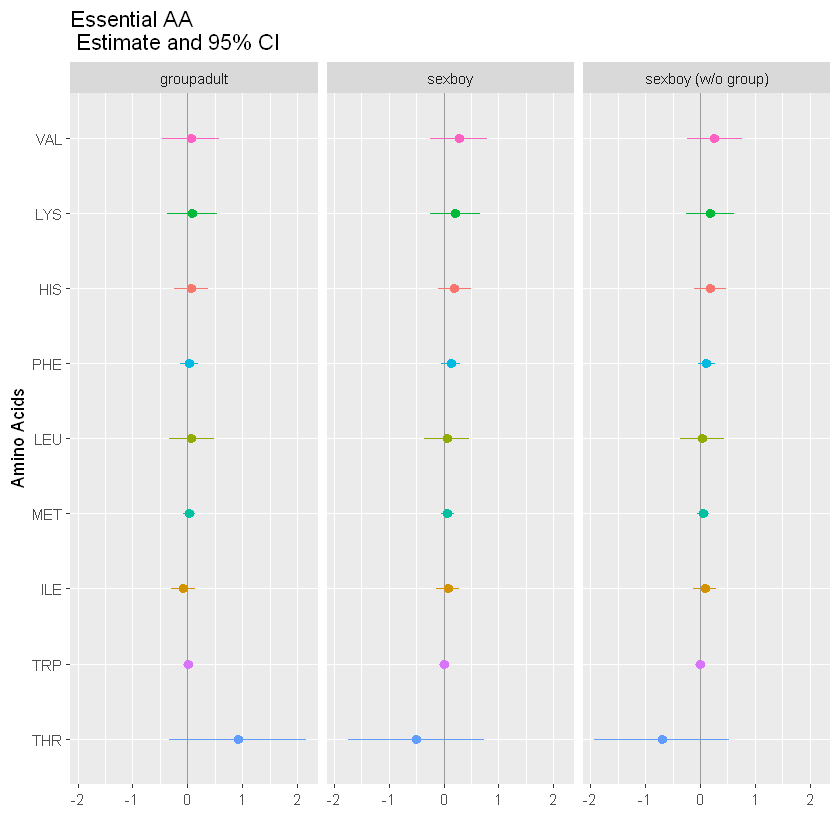

In [40]:
group_E <- rbind(sexCoef_E_G, groupCoef_E_G, sexCoef_E_S)

#png(filename="./plots/group_E.png", units="cm", width=20, height=20, res = 300)
ggplot(group_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    facet_wrap(~term) + 
    xlab('Amino Acids') + ylab('') +
    ggtitle('Essential AA \n Estimate and 95% CI') 
#dev.off()

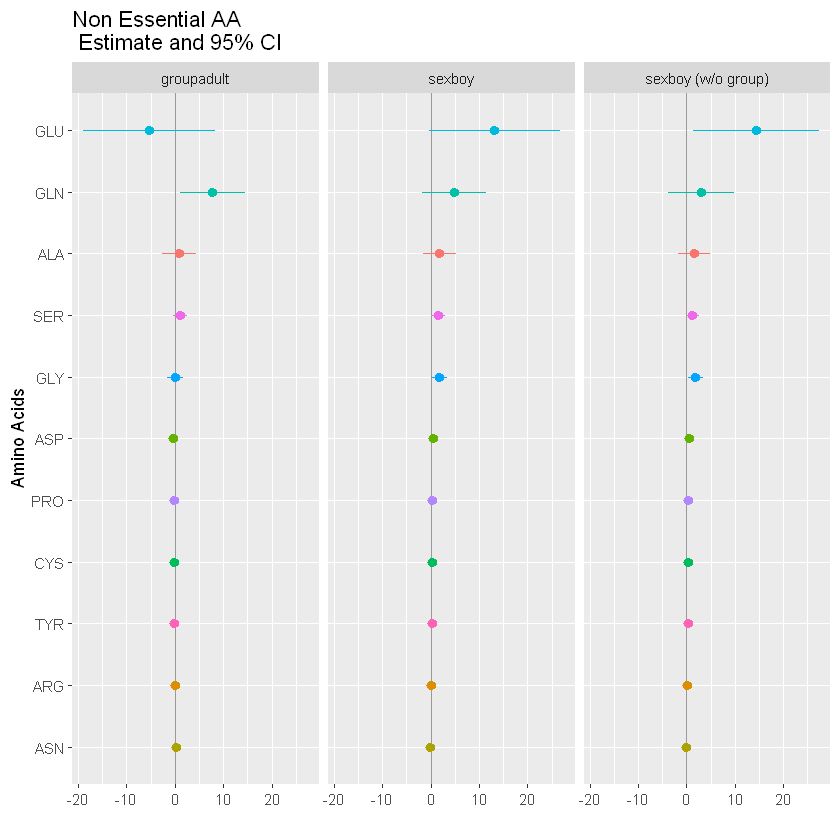

In [41]:
group_NE <- rbind(sexCoef_NE_G, groupCoef_NE_G, sexCoef_NE_S)

#png(filename="./plots/group_NE.png", units="cm", width=20, height=20, res = 300)
ggplot(group_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    facet_wrap(~term) + 
    xlab('Amino Acids') + ylab('') +
    ggtitle('Non Essential AA \n Estimate and 95% CI') 
#dev.off()

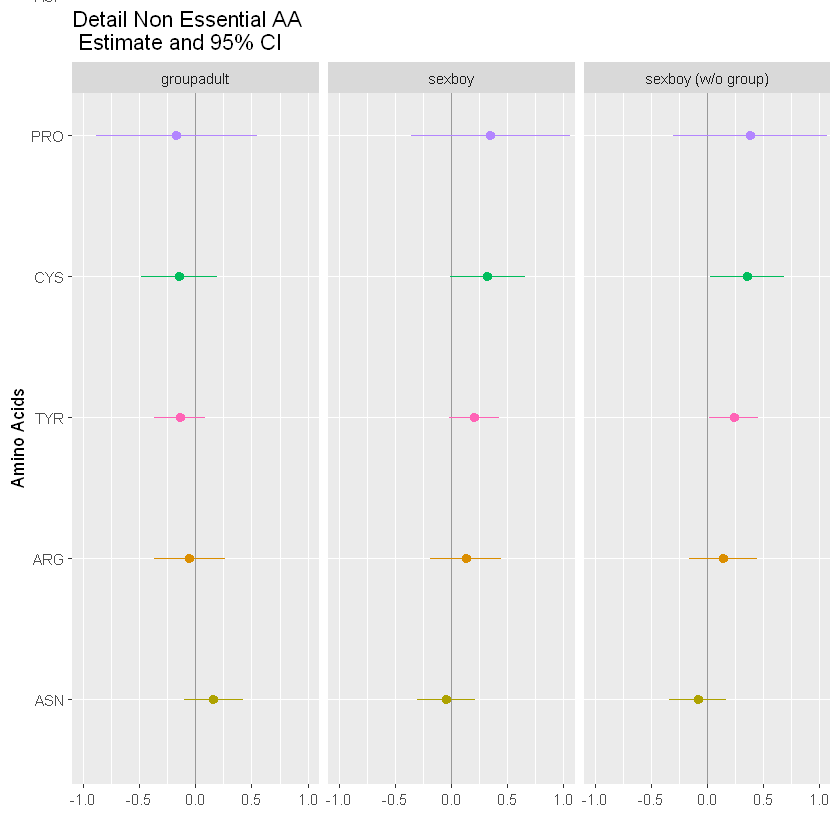

In [42]:
#png(filename="./plots/group_NE_detail.png", units="cm", width=20, height=20, res = 300)
ggplot(group_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip(ylim = c(-1, 1), xlim = c(1, 4.7)) + 
    facet_wrap(~term) + 
    xlab('Amino Acids') + ylab('') +
    ggtitle('Detail Non Essential AA \n Estimate and 95% CI') 
#dev.off()

# Fastest Growing Babies

Here only ids with all 4 measurements are used. 

In [43]:
percentil <- function(x, p){
    n <- length(x)
    xs <- sort(x)
    
    k <- ceiling(p*n)
    
    return(list(percentil = k, value = xs[k]))
}

In [44]:
x <- c(2, 4, 5, 10)

percentil(x, 0.75)


$percentil
[1] 3

$value
[1] 5

In [45]:
head(headC)
head(weight)

id,group,sex,HeadCircumcm1,HCcm2,HCcm3,HCcm4
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,teen,girl,34,37,39,42
2,teen,boy,35,37,38,41
3,teen,boy,35,37,NA,NA
4,teen,boy,37,NA,NA,NA
5,teen,NA,34,NA,NA,NA
6,teen,boy,35,36,39,44


id,group,sex,BABYWeigth1g,BABYWeigth2g,BABYWeigth3g,BABYWeigth4g
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,teen,girl,3492.7,3592.5,5488.6,8282.74
2,teen,boy,3392.9,4091.5,5987.5,7883.57
3,teen,boy,2993.8,3592.5,NA,NA
4,teen,boy,3692.3,NA,NA,NA
5,teen,NA,3592.5,NA,NA,NA
6,teen,boy,3093.5,3392.9,4989.6,6785.80


In [46]:
# All observed:
headC_NO_NA <- headC %>% na.omit()
weight_NO_NA <- weight %>% na.omit()

headCLong_NO_NA <- headC_NO_NA %>% gather(weekNames, head, -id, -group, -sex)
weightLong_NO_NA <- weight_NO_NA %>% gather(weekNames, weight, -id, -group, -sex)

In [47]:
headCLong_NO_NA <- 
    headCLong_NO_NA %>% 
        mutate(week = gsub(".*cm1", "1", weekNames)) %>%
        mutate(week = gsub(".*cm2", "2", week)) %>%
        mutate(week = gsub(".*cm3", "8", week)) %>%
        mutate(week = gsub(".*cm4", "16", week)) %>% 
        mutate(week = as.numeric(week))

In [48]:
weightLong_NO_NA <- 
    weightLong_NO_NA %>% 
        mutate(week = gsub(".*1g", "1", weekNames)) %>%
        mutate(week = gsub(".*2g", "2", week)) %>%
        mutate(week = gsub(".*3g", "8", week)) %>%
        mutate(week = gsub(".*4g", "16", week)) %>% 
        mutate(week = as.numeric(week))

In [49]:
head(headCLong_NO_NA)
headCLong_NO_NA %>% group_by(sex) %>% summarise(n())

id,group,sex,weekNames,head,week
<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
1,teen,girl,HeadCircumcm1,34,1
2,teen,boy,HeadCircumcm1,35,1
6,teen,boy,HeadCircumcm1,35,1
7,teen,boy,HeadCircumcm1,34,1
8,teen,boy,HeadCircumcm1,34,1
20,teen,boy,HeadCircumcm1,33,1


sex,n()
<fct>,<int>
girl,24
boy,60


In [50]:
head(weightLong_NO_NA)
weightLong_NO_NA %>% group_by(sex) %>% summarise(n())

id,group,sex,weekNames,weight,week
<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
1,teen,girl,BABYWeigth1g,3492.7,1
2,teen,boy,BABYWeigth1g,3392.9,1
6,teen,boy,BABYWeigth1g,3093.5,1
7,teen,boy,BABYWeigth1g,2993.7,1
8,teen,boy,BABYWeigth1g,3392.9,1
14,teen,girl,BABYWeigth1g,2164.0,1


sex,n()
<fct>,<int>
girl,28
boy,56


In [51]:
dim(headCLong_NO_NA)
dim(weightLong_NO_NA)

[1] 84  6

[1] 84  6

In [52]:
head_id <- lmer(head ~ week + (1 + week| id), data = headCLong_NO_NA)
weight_id <- lmer(weight ~ week + (1 + week| id), data = weightLong_NO_NA)

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


In [53]:
?isSingular

In [54]:
fixef(head_id)
ranef(head_id)

(Intercept)        week 
 34.1888083   0.4411642

$id
   (Intercept)          week
1   0.59205613  0.0164598483
2   0.35197434  0.0097852956
6   1.01115063  0.0281111621
7  -0.14027978 -0.0038999407
8   0.43747106  0.0121622037
20 -0.43723610 -0.0121556715
23 -1.14107310 -0.0317231578
30  0.76699757  0.0213234233
32 -0.46980628 -0.0130611603
35 -0.52680409 -0.0146457657
36 -0.86040187 -0.0239201714
37 -0.86040187 -0.0239201714
41 -0.04664051 -0.0012966604
48  2.54898207  0.0708646626
52 -0.43723610 -0.0121556715
54 -0.01419361 -0.0003945989
55 -0.80340406 -0.0223355660
57 -0.31929248 -0.0088767019
59  1.25518041  0.0348954736
62 -0.64881898 -0.0180379215
64 -0.25822340 -0.0071789104

with conditional variances for "id" 

In [55]:
fixef(weight_id)
ranef(weight_id)

(Intercept)        week 
   3237.692     237.473

$id
   (Intercept)       week
1    168.08267  36.043397
2    172.81118  37.057373
6    -64.77157 -13.889519
7    -99.46309 -21.328717
8     95.45112  20.468396
14  -278.14172 -59.644297
20  -270.48381 -58.002146
23  -199.39121 -42.757154
30   261.63063  56.103683
32    47.44798  10.174673
35    59.96879  12.859619
36   -68.77083 -14.747115
37  -240.55796 -51.584891
41  -119.76730 -25.682721
48   469.93695 100.772579
52    44.24314   9.487432
53    24.14365   5.177328
54  -116.54443 -24.991614
55   -88.84043 -19.050809
59   272.89611  58.519436
62   -69.87986 -14.984934

with conditional variances for "id" 

In [56]:
head_week_p1 <- percentil(ranef(head_id)$id$week, 1/3)$value
head_week_p2 <- percentil(ranef(head_id)$id$week, 2/3)$value

head_start_p1 <- percentil(ranef(head_id)$id$`(Intercept)`, 1/3)$value
head_start_p2 <- percentil(ranef(head_id)$id$`(Intercept)`, 2/3)$value

In [57]:
weight_week_p1 <- percentil(ranef(weight_id)$id$week, 1/3)$value
weight_week_p2 <- percentil(ranef(weight_id)$id$week, 2/3)$value

weight_start_p1 <- percentil(ranef(weight_id)$id$`(Intercept)`, 1/3)$value
weight_start_p2 <- percentil(ranef(weight_id)$id$`(Intercept)`, 2/3)$value

In [58]:
hc_growth <- 
    ranef(head_id)$id %>% mutate(id = headC_NO_NA$id, 
                             hc_speed = ifelse(week < head_week_p1, 'slow',
                                   ifelse(week < head_week_p2, 'moderate', 'fast'))) %>%
                      mutate(first_hc = ifelse(`(Intercept)` < head_start_p1, 'small', 
                                              ifelse(`(Intercept)` < head_start_p2, 'normal', 'big')))

hc_growth %>% filter(hc_speed != 'moderate') %>% summarise(n())

n()
<int>
14


In [59]:
weight_growth <- 
    ranef(weight_id)$id %>% mutate(id = weight_NO_NA$id,
                             weight_speed = ifelse(week < weight_week_p1, 'slow',
                                   ifelse(week < weight_week_p2, 'moderate', 'fast'))) %>%
                      mutate(first_weight = ifelse(`(Intercept)` < weight_start_p1, 'small', 
                                              ifelse(`(Intercept)` < weight_start_p2, 'normal', 'big')))

weight_growth %>% filter(weight_speed != 'moderate') %>% summarise(n())

n()
<int>
14


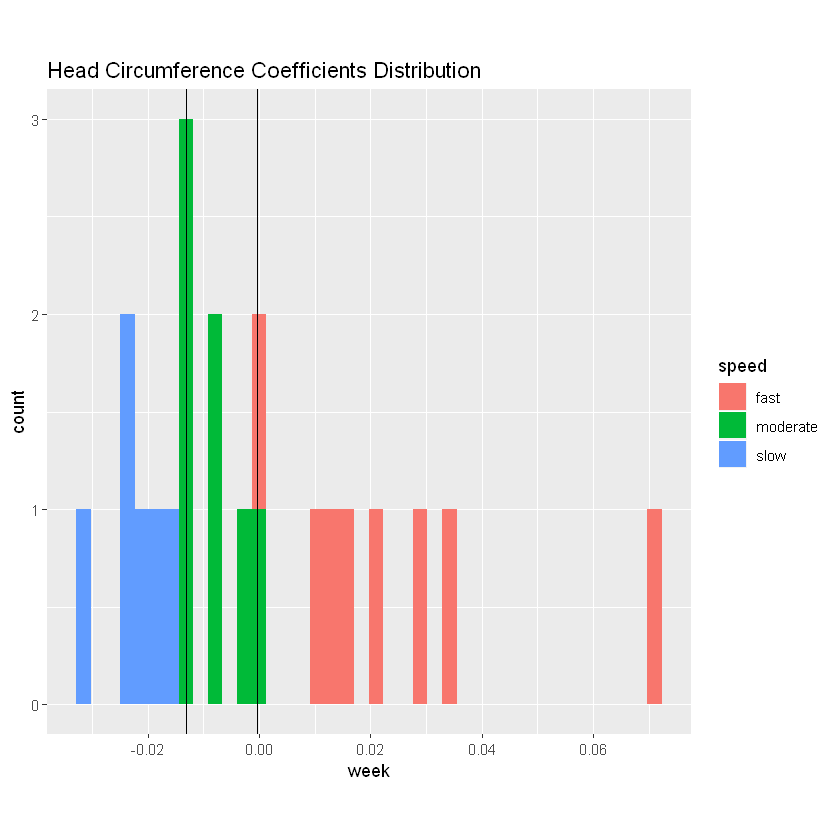

In [60]:
#png(filename="./plots/speed and start/hc_dist.png", units="cm", width=20, height=20, res = 300)
ggplot(hc_growth %>% mutate(speed = hc_speed), aes(x = week, fill = speed)) + geom_histogram(bins = 40) +
    geom_vline(xintercept = head_week_p1) + 
    geom_vline(xintercept = head_week_p2) +
    theme(aspect.ratio = 1) +
    ggtitle('Head Circumference Coefficients Distribution')
#dev.off()

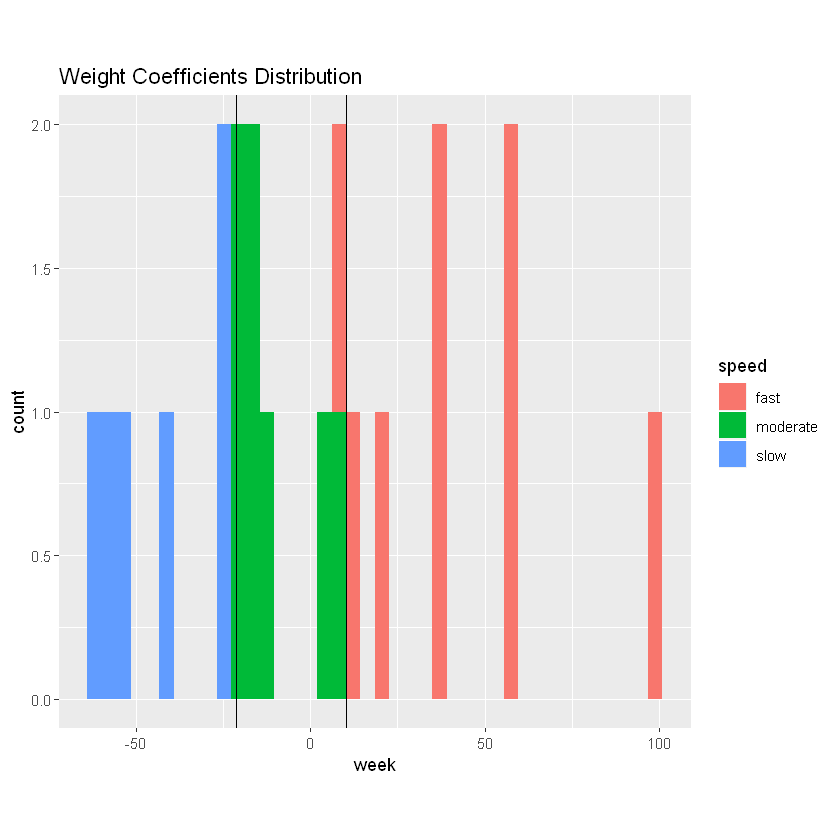

In [61]:
#png(filename="./plots/speed and start/weight_dist.png", units="cm", width=20, height=20, res = 300)
ggplot(weight_growth %>% mutate(speed = weight_speed), aes(x = week, fill = speed)) + 
    #geom_density() +
    geom_histogram(bins = 40) +
    geom_vline(xintercept = weight_week_p1) + 
    geom_vline(xintercept = weight_week_p2) +
    theme(aspect.ratio = 1) +
    ggtitle('Weight Coefficients Distribution')

#dev.off()

In [62]:
df_hc <- headCLong_NO_NA %>% 
    inner_join(hc_growth %>% select(id, hc_speed), by = 'id') %>% 
    mutate(speed = hc_speed)

df_hc %>% filter(week == 1) %>% group_by(sex, speed) %>% summarise(n())

#png(filename="./plots/speed and start/hc_time.png", units="cm", width=20, height=20, res = 500)
p_hc <-
    ggplot(df_hc, aes(x = week, y = head, group = id)) + 
        geom_point() + geom_line(alpha=0.5) +
        geom_line(stat = 'smooth', method = lm, se = F, alpha = 0.8, linetype = 'longdash') +
        facet_wrap(~speed) + 
        theme_bw() +
        theme(legend.position = "none", aspect.ratio = 1) +
        ggtitle('B.') + ylab('head circumference (cm)')
#dev.off()

sex,speed,n()
<fct>,<chr>,<int>
girl,fast,2
girl,moderate,2
girl,slow,2
boy,fast,6
boy,moderate,5
boy,slow,4


In [63]:
df_weight <- weightLong_NO_NA %>% 
    inner_join(weight_growth %>% select(id, weight_speed), by = 'id') %>% 
    mutate(speed = weight_speed)

df_weight %>% filter(week == 1) %>% group_by(sex, speed) %>% summarise(n())

#png(filename="./plots/speed and start/weight_time.png", units="cm", width=20, height=20, res = 300)
p_weight <-
    ggplot(df_weight, aes(x = week, y = weight, group = id)) + 
        geom_point() + geom_line(alpha = 0.5) +
        theme(legend.position = "none", aspect.ratio = 1) +
        geom_line(stat = 'smooth', method = lm, se = F, alpha = 0.8, linetype = 'longdash') +
        facet_wrap(~speed) + 
        theme_bw() +
        theme(legend.position = "none", aspect.ratio = 1) +
        ggtitle('A.') + ylab('weight (gr)')
#dev.off()

sex,speed,n()
<fct>,<chr>,<int>
girl,fast,2
girl,moderate,2
girl,slow,3
boy,fast,6
boy,moderate,5
boy,slow,3


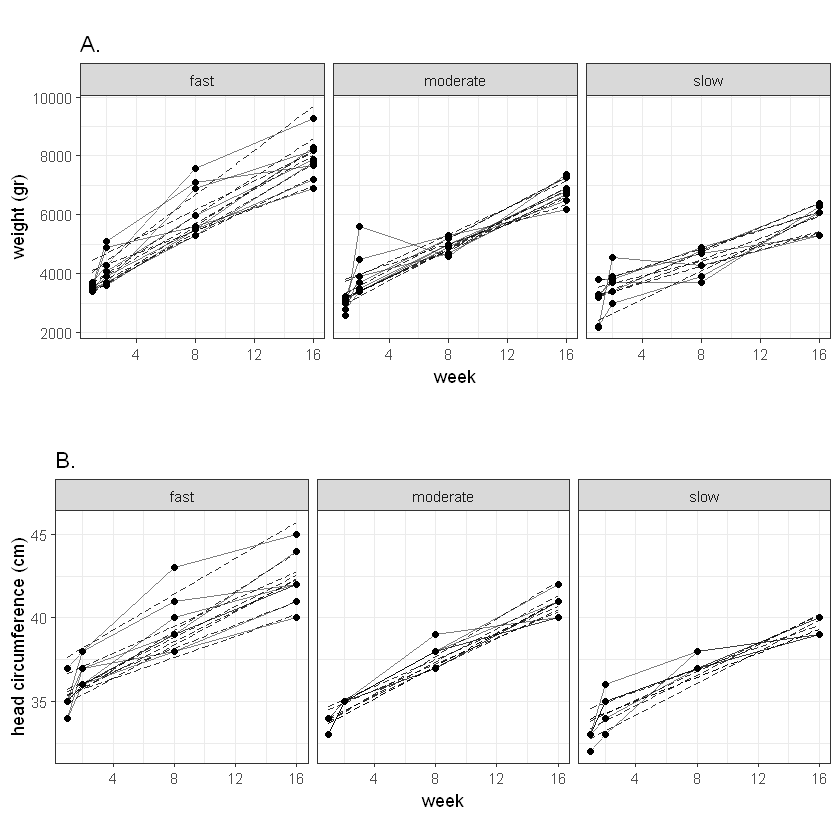

In [64]:
#png(filename="./plots/speed and start/hc_w_time.png", units="cm", width=20, height=20, res = 300)
grid.arrange(p_weight, p_hc, 
            layout_matrix = rbind(c(1), c(2))) 
#dev.off()

## AA concentration for fast growing babies

In [65]:
meSpeed <- function(df){
    
    me <- lmer(level ~ sex + week + speed + (1| id), data = df)
    
    return(me)
}

In [66]:
me_E_S <- list()
tidy_E_S <- list()

nAA_E_wo_TRP <- 1:nAA_E
for(i in nAA_E_wo_TRP[-8]){

    df <- AA_E_Nested$data[[i]] %>% filter(id %in% headC_NO_NA$id)
    df <- df %>% inner_join(hc_growth %>% select(id, speed = hc_speed, start = first_hc), by = 'id') %>% 
        filter(speed != 'moderate')
    
    me_E_S[[i]] <- meSpeed(df)
    tidy_E_S[[i]] <- tidy(me_E_S[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
   
}

In [67]:
# TRP data is unsufficient. Almost all meas. are 0.
j <- 8
#df <- AA_E_Nested$data[[j]] %>% filter(id %in% headC_NO_NA$id)
#mod <- meWeek(df)

#tidy(mod, effects = 'fixed')
head(AA_E_Nested$data[[j]])

id,group,age,sex,weekNames,level,week
<fct>,<fct>,<dbl>,<fct>,<chr>,<dbl>,<dbl>
1,teen,17,girl,TRPCalostrum,0,1
2,teen,16,boy,TRPCalostrum,0,1
3,teen,17,boy,TRPCalostrum,0,1
4,teen,16,boy,TRPCalostrum,0,1
5,teen,16,NA,TRPCalostrum,0,1
6,teen,16,boy,TRPCalostrum,0,1


In [68]:
me_NE_S <- list()
tidy_NE_S <- list()

for(i in 1:nAA_NE){
    
    df <- AA_NE_Nested$data[[i]] %>% filter(id %in% headC_NO_NA$id)
    df <- df %>% inner_join(hc_growth %>% select(id, speed = hc_speed, start = first_hc), by = 'id') %>%
        filter(speed != 'moderate')
    
    me_NE_S[[i]] <- meSpeed(df)
    tidy_NE_S[[i]] <- tidy(me_NE_S[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

boundary (singular) fit: see ?isSingular


In [69]:
speed_E <- bind_rows(tidy_E_S) %>% filter(grepl("speed", term)) 
speed_NE <- bind_rows(tidy_NE_S) %>% filter(grepl("speed", term)) 

speed_E
speed_NE

term,estimate,std.error,statistic,AA
<chr>,<dbl>,<dbl>,<dbl>,<chr>
speedslow,0.03923469,0.2860682,0.1371515,HIS
speedslow,-0.25513679,0.1539446,-1.6573288,ILE
speedslow,-0.18431813,0.4549518,-0.4051377,LEU
speedslow,-0.36268885,0.3822199,-0.9489011,LYS
speedslow,-0.10445143,0.1164600,-0.8968869,MET
speedslow,-0.07999467,0.1866290,-0.4286294,PHE
speedslow,-1.73629832,1.0729249,-1.6182851,THR
speedslow,-0.62784275,0.5893949,-1.0652328,VAL


term,estimate,std.error,statistic,AA
<chr>,<dbl>,<dbl>,<dbl>,<chr>
speedslow,-0.321482992,0.2785112,-1.15429116,ARG
speedslow,0.259016879,0.9358773,0.27676373,ASP
speedslow,-2.152256761,3.4407642,-0.62551707,ALA
speedslow,0.006730534,0.1848849,0.03640392,ASN
speedslow,0.381998286,0.3379170,1.13045002,CYS
speedslow,-0.833478245,1.8836167,-0.44248825,GLY
speedslow,-2.578198948,13.1509696,-0.19604630,GLU
speedslow,1.707580573,6.0473231,0.28236966,GLN
speedslow,-0.577353741,0.5530983,-1.04385379,PRO


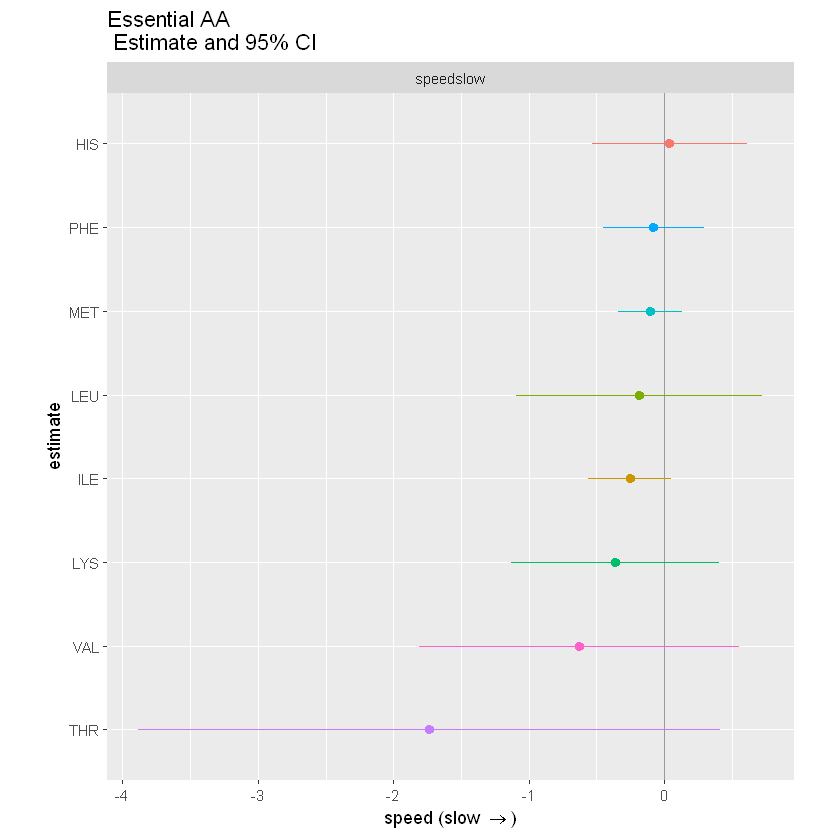

In [70]:
#png(filename="./plots/speed and start/EAA_speed_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(speed_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip() + 
    facet_wrap(~term) + 
    ggtitle('Essential AA \n Estimate and 95% CI') + ylab(TeX('speed (slow $\\rightarrow$)')) + xlab('estimate')
#dev.off()

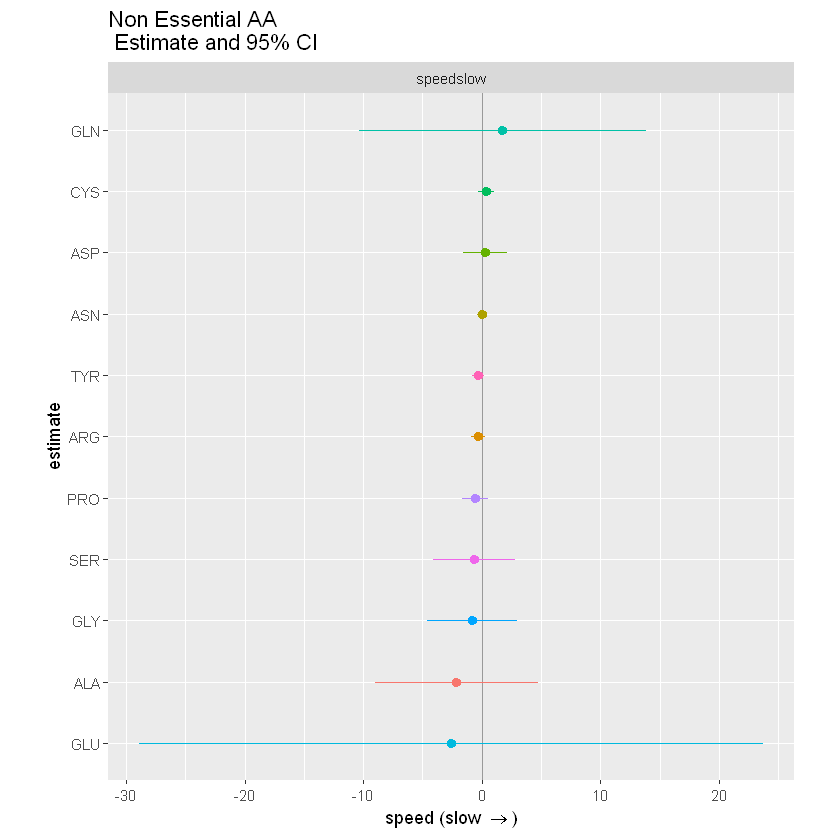

In [71]:
#png(filename="./plots/speed and start/NEAA_speed_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(speed_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip() + 
    facet_wrap(~term) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') + ylab(TeX('speed (slow $\\rightarrow$)')) + xlab('estimate')
#dev.off()

In [72]:
meStart <- function(df){
    
    me <- lmer(level ~ week + start + (1| id), data = df)
    
    return(me)
}

In [73]:
me_E_Start <- list()
tidy_E_Start <- list()

nAA_E_wo_TRP <- 1:nAA_E
for(i in nAA_E_wo_TRP[-8]){

    df <- AA_E_Nested$data[[i]] %>% filter(id %in% headC_NO_NA$id)
    df <- df %>% inner_join(hc_growth %>% select(id, speed = hc_speed, start = first_hc), by = 'id') %>%
        filter(start != 'normal')
    
    me_E_Start[[i]] <- meStart(df)
    tidy_E_Start[[i]] <- tidy(me_E_Start[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
   
}

In [74]:
me_NE_Start <- list()
tidy_NE_Start <- list()

for(i in 1:nAA_NE){
    
    df <- AA_NE_Nested$data[[i]] %>% filter(id %in% headC_NO_NA$id)
    df <- df %>% inner_join(hc_growth %>% select(id, speed = hc_speed, start = first_hc), by = 'id') %>%
        filter(start != 'normal')
    
    me_NE_Start[[i]] <- meStart(df)
    tidy_NE_Start[[i]] <- tidy(me_NE_Start[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

boundary (singular) fit: see ?isSingular


In [75]:
tidy_E_Start[[1]]

term,estimate,std.error,statistic,AA
<chr>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),2.0117774901,0.2159049,9.31788750,HIS
week,0.0002242841,0.0172505,0.01300159,HIS
startsmall,0.0186126848,0.2852156,0.06525830,HIS


In [76]:
start_E <- bind_rows(tidy_E_Start) %>% filter(grepl("start", term)) 
start_NE <- bind_rows(tidy_NE_Start) %>% filter(grepl("start", term)) 

start_E
start_NE

term,estimate,std.error,statistic,AA
<chr>,<dbl>,<dbl>,<dbl>,<chr>
startsmall,0.01861268,0.2852156,0.0652583,HIS
startsmall,-0.26807322,0.1558782,-1.7197611,ILE
startsmall,-0.22080716,0.4643266,-0.4755428,LEU
startsmall,-0.38574064,0.3734910,-1.0327976,LYS
startsmall,-0.11859162,0.1240855,-0.9557247,MET
startsmall,-0.10573769,0.1947653,-0.5428981,PHE
startsmall,-1.64889213,1.0786694,-1.5286353,THR
startsmall,-0.68874440,0.6059481,-1.1366392,VAL


term,estimate,std.error,statistic,AA
<chr>,<dbl>,<dbl>,<dbl>,<chr>
startsmall,-0.32959534,0.2675748,-1.23178789,ARG
startsmall,0.22913243,0.9029031,0.25377299,ASP
startsmall,-2.36003741,3.3879479,-0.69659791,ALA
startsmall,0.02777939,0.1904047,0.14589650,ASN
startsmall,0.34082611,0.3518682,0.96861868,CYS
startsmall,-1.08091615,1.9916289,-0.54272971,GLY
startsmall,-4.31906429,14.3597124,-0.30077652,GLU
startsmall,0.46529600,7.1404861,0.06516307,GLN
startsmall,-0.60492699,0.5364408,-1.12766767,PRO


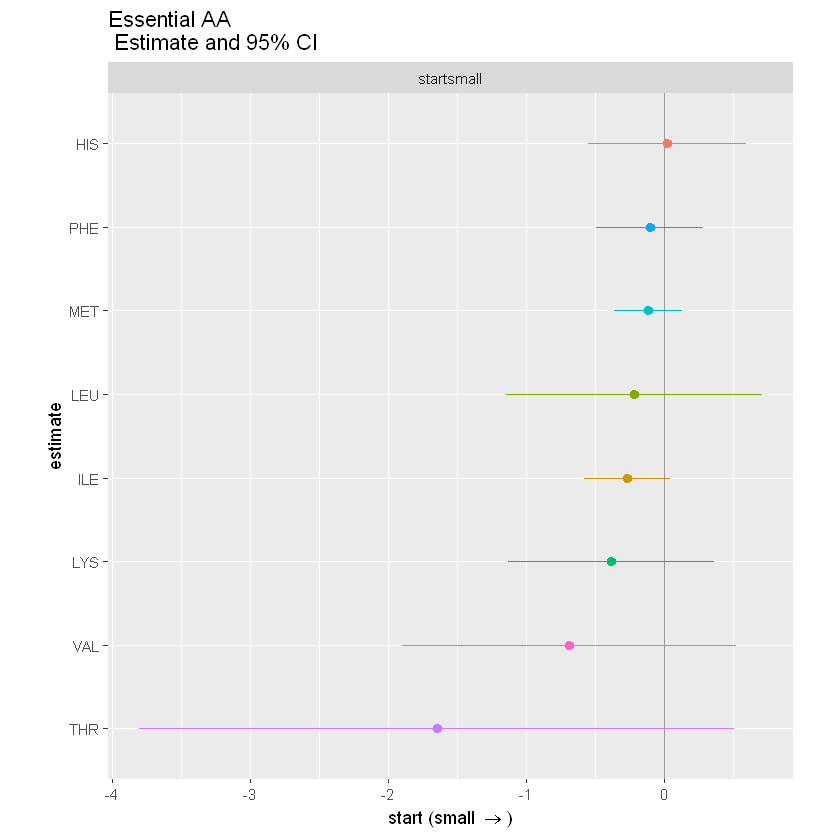

In [77]:
#png(filename="./plots/speed and start/EAA_start_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(start_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip() + 
    facet_wrap(~term) + 
    ggtitle('Essential AA \n Estimate and 95% CI') + ylab(TeX('start (small $\\rightarrow$)')) + xlab('estimate')
#dev.off()

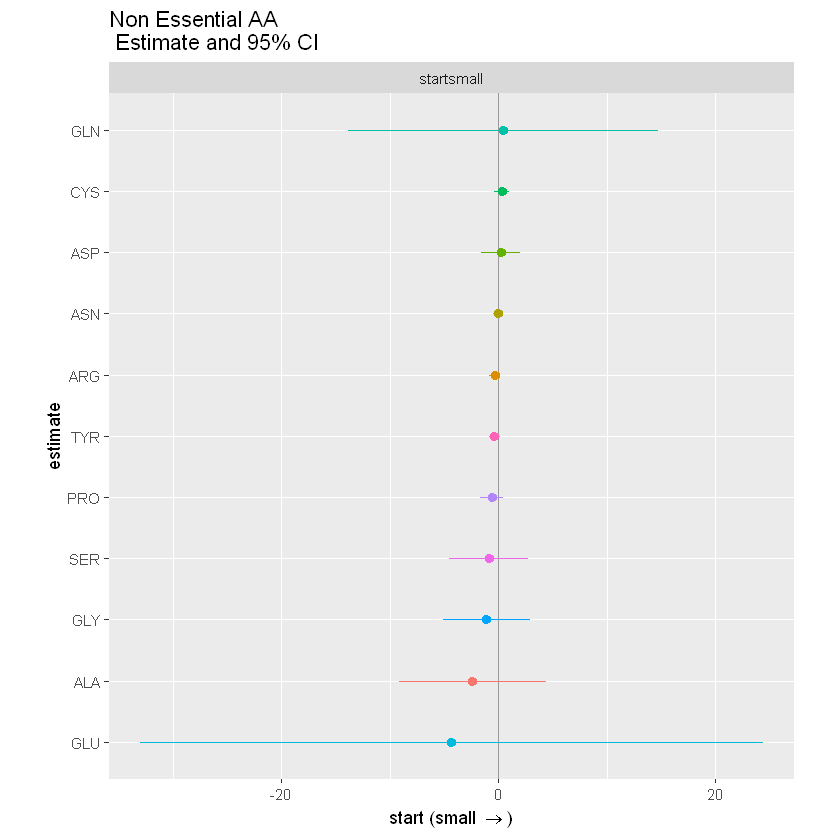

In [78]:
#png(filename="./plots/speed and start/NEAA_start_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(start_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip() + 
    facet_wrap(~term) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') + ylab(TeX('start (small $\\rightarrow$)')) + xlab('estimate')
#dev.off()

# Total amino acid levels and Final Plots

In [79]:
AA_E_total <- AA_E_Long %>% filter(!is.na(sex)) %>% group_by(id, week, sex, group) %>% summarise(level = sum(level,na.rm = T))
AA_NE_total <- AA_NE_Long %>% filter(!is.na(sex)) %>% group_by(id, week, sex, group) %>% summarise(level = sum(level,na.rm = T))

In [80]:
AA_E_total %>% filter(id == 2)

id,week,sex,group,level
<fct>,<dbl>,<fct>,<fct>,<dbl>
2,1,boy,teen,5
2,2,boy,teen,21
2,8,boy,teen,10
2,16,boy,teen,16


In [81]:
meSex <- function(df){
    
    me <- lmer(level ~ sex + week + (1 | id), data = df)
    
    return(me)
}

In [82]:
me_E_S <- list()
tidy_E_S <- list()

for(i in 1:nAA_E){
    
    me_E_S[[i]] <- meSex(AA_E_Nested$data[[i]])
    tidy_E_S[[i]] <- tidy(me_E_S[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

boundary (singular) fit: see ?isSingular


In [83]:
me_NE_S <- list()
tidy_NE_S <- list()

for(i in 1:nAA_NE){
    
    me_NE_S[[i]] <- meSex(AA_NE_Nested$data[[i]])
    tidy_NE_S[[i]] <- tidy(me_NE_S[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [84]:
total_AA_E <- meSex(AA_E_total)
total_AA_NE <- meSex(AA_NE_total)

In [85]:
tidy_total_E <- tidy(total_AA_E, effects = 'fixed') %>% mutate(AA = 'total', type = 'Essential')
tidy_total_NE <- tidy(total_AA_NE, effects = 'fixed') %>% mutate(AA = 'total', type = 'Non Essential')

In [86]:
tidy_E <- bind_rows(tidy_E_S, tidy_total_E) %>% mutate(type = 'Essential')
tidy_NE <- bind_rows(tidy_NE_S, tidy_total_NE) %>% mutate(type = 'Non Essential')

In [87]:
tidy_E

term,estimate,std.error,statistic,AA,type
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
(Intercept),1.7326073792,0.128407731,13.49301452,HIS,Essential
sexboy,0.1800951053,0.147831420,1.21824647,HIS,Essential
week,0.0155052457,0.010917283,1.42024766,HIS,Essential
(Intercept),0.4421079596,0.087982135,5.02497420,ILE,Essential
sexboy,0.0890954265,0.104943804,0.84898225,ILE,Essential
week,0.0133510720,0.006676275,1.99977872,ILE,Essential
(Intercept),1.5116065512,0.176766559,8.55142830,LEU,Essential
sexboy,0.0387230482,0.197753114,0.19581511,LEU,Essential
week,0.0497045109,0.016096316,3.08794330,LEU,Essential


In [88]:
plotdf_E <- 
    tidy_E %>% filter(grepl("sexboy", term)) %>% 
            #mutate(size = ifelse(AA %in% c('THR', 'MET', 'ILE', 'PRO', 'ASP', 'CYS'), 'small', 'big')) %>%
            mutate(AA = factor(AA, levels = c('total', 'THR', 'TRP', 'LEU', 'MET', 'ILE', 'PHE', 'LYS', 'HIS', 'VAL'))) %>%
            mutate(sig = 'b.no')

plotdf_E %>% arrange(estimate)

term,estimate,std.error,statistic,AA,type,sig
<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
sexboy,-0.70135843,0.61254574,-1.14498950,THR,Essential,b.no
sexboy,-0.07719780,1.69897859,-0.04543777,total,Essential,b.no
sexboy,-0.00338907,0.01566710,-0.21631767,TRP,Essential,b.no
sexboy,0.03872305,0.19775311,0.19581511,LEU,Essential,b.no
sexboy,0.06183345,0.05528159,1.11851787,MET,Essential,b.no
sexboy,0.08909543,0.10494380,0.84898225,ILE,Essential,b.no
sexboy,0.11793047,0.08011753,1.47196841,PHE,Essential,b.no
sexboy,0.17976498,0.21885111,0.82140309,LYS,Essential,b.no
sexboy,0.18009511,0.14783142,1.21824647,HIS,Essential,b.no


In [89]:
plotdf_NE <- 
    tidy_NE %>% filter(grepl("sexboy", term)) %>% 
            mutate(size = ifelse(AA %in% c('ASN', 'ARG', 'TYR', 'PRO', 'ASP', 'CYS', 'GLY', 'SER'), 'small', 'big')) %>%
            mutate(AA = factor(AA, levels = c('total', 'ASN', 'ARG', 'TYR', 'CYS', 'PRO', 'ASP', 
                                             'SER', 'GLY', 'ALA', 'GLN', 'GLU'))) %>%
            mutate(sig = ifelse(AA %in% c('GLU', 'GLY', 'CYS', 'TYR'), 'a.yes', 'b.no'))

plotdf_NE %>% arrange(estimate)

term,estimate,std.error,statistic,AA,type,size,sig
<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>
sexboy,-0.08339889,0.1257034,-0.6634576,ASN,Non Essential,small,b.no
sexboy,0.14263751,0.1522882,0.9366285,ARG,Non Essential,small,b.no
sexboy,0.23773898,0.1099537,2.1621732,TYR,Non Essential,small,a.yes
sexboy,0.35682776,0.1635167,2.1822096,CYS,Non Essential,small,a.yes
sexboy,0.38692513,0.3436295,1.1259951,PRO,Non Essential,small,b.no
sexboy,0.54756968,0.4801045,1.1405219,ASP,Non Essential,small,b.no
sexboy,1.22571449,0.6975134,1.7572631,SER,Non Essential,small,b.no
sexboy,1.61818930,1.6590414,0.9753761,ALA,Non Essential,big,b.no
sexboy,1.81908239,0.7897730,2.3032978,GLY,Non Essential,small,a.yes


In [90]:
pE <-
    ggplot(plotdf_E, aes(x = reorder(AA, estimate), y = estimate, color = sig)) +   
        geom_hline(yintercept = 0, alpha = 0.8, linetype="dotted") +
        theme_bw() + 
        geom_pointrange(aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) +
        theme(legend.position = "none") +  
        coord_flip() + 
        facet_wrap(~type) + 
        xlab('') + ylab('') +
        ggtitle('C.') +
        annotate("text", x = 0, y = -1, label = TeX('$\\leftarrow$ Favors Girls'), size = 2) +
        annotate("text", x = 0, y = 1, label = TeX('Favors Boys $\\rightarrow$'), size = 2) +
        annotate("text", x = -1, y = -2, label = "") +
        scale_colour_grey(start = 0.5, end = 0.5)

In [91]:
pNE <- 
    ggplot(plotdf_NE, aes(x = AA, y = estimate, color = sig)) +  
        geom_hline(yintercept = 0, alpha = 0.8, linetype="dotted") +
        theme_bw() + 
        geom_pointrange(aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) +
        theme(legend.position = "none") +  
        coord_flip() + 
        facet_wrap(~type) + 
        xlab('') + ylab('') +
        ggtitle('A.') +
        annotate("text", x = 0, y = -10, label = TeX('$\\leftarrow$ Favors Girls'), size = 2) +
        annotate("text", x = 0, y = 10, label = TeX('Favors Boys $\\rightarrow$'), size = 2) +
        annotate("text", x = -1, y = -2, label = "") + scale_colour_grey(start = 0, end = 0.5)

In [92]:
pNE_detail <-
    ggplot(plotdf_NE %>% filter(size == 'small'), aes(x = AA, y = estimate, color = sig)) +  
        geom_hline(yintercept = 0, alpha = 0.8, linetype="dotted") +
        theme_bw() + 
        geom_pointrange(aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) +
        theme(legend.position = "none") +
        facet_wrap(~type, scales = "free") + 
        coord_flip() + 
        xlab('') + ylab('') +
        ggtitle('B. Detail') +
        annotate("text", x = 0, y = -0.8, label = TeX('$\\leftarrow$ Favors Girls'), size = 2) +
        annotate("text", x = 0, y = 0.8, label = TeX('Favors Boys $\\rightarrow$'), size = 2) +
        annotate("text", x = -0.5, y = -2, label = "") + scale_colour_grey(start = 0, end = 0.5)

Warning message:
"Setting row names on a tibble is deprecated."Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"

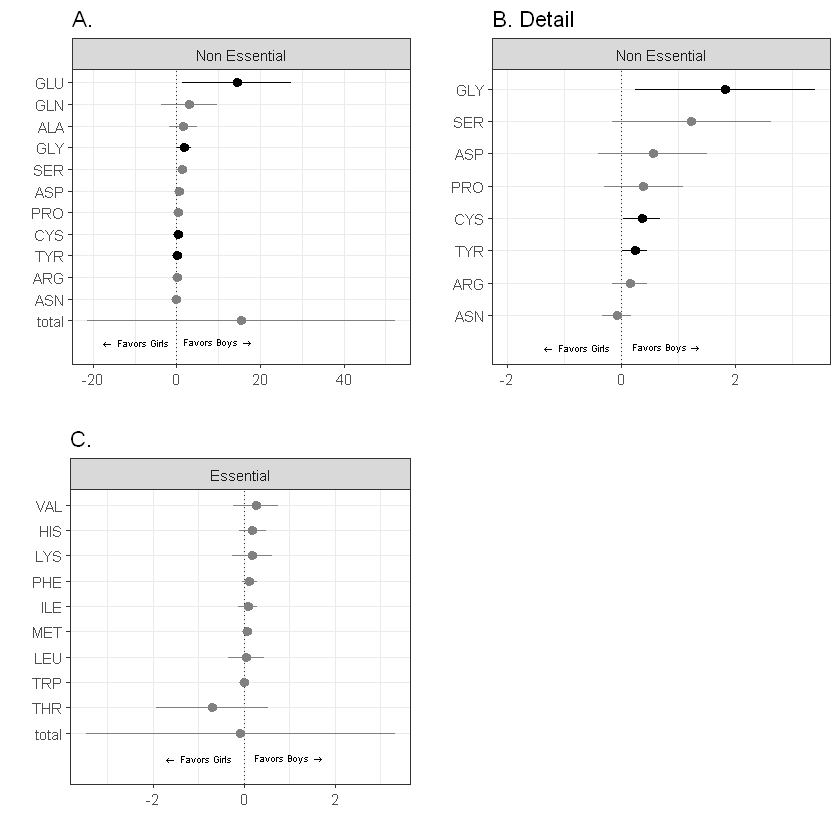

In [93]:
# https://cran.r-project.org/web/packages/egg/vignettes/Ecosystem.html
sig_tab <- plotdf_NE %>% filter(sig == 'a.yes') %>% select(2:4) %>% 
                        mutate(estimate = round(estimate, 2), 
                               std.error = round(std.error, 2), statistic = round(statistic, 2)) %>%
                        arrange(-estimate)

row.names(sig_tab) <- c('GLU', 'GLY', 'CYS', 'TYR')

#png(filename="./plots/sex_mosaic_final.png", units="cm", width=20, height=20, res = 500)
grid.arrange(pNE, pNE_detail, pE, 
            layout_matrix = rbind(c(1, 2), c(3, NA))) 

#dev.off()

In [94]:
pspeed_E <-
    ggplot(speed_E %>% mutate(type = 'Essential'), aes(x = AA, y = estimate)) + 
        geom_hline(yintercept = 0, alpha = 0.8, linetype="dotted") + 
        geom_pointrange(alpha = 0.5, 
                        aes(x = reorder(AA, estimate), ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
        theme(legend.position = "none", aspect.ratio = 1) + 
        theme_bw() +
        coord_flip() + 
        facet_wrap(~type) + 
        ggtitle('A.') + ylab('') + xlab('') +
        annotate("text", x = 0, y = -0.5, label = TeX('$\\leftarrow$ Favors Fast'), size = 3) +
        annotate("text", x = 0, y = 0.5, label = TeX('Favors Slow $\\rightarrow$'), size = 3) +
        annotate("text", x = -0.5, y = -2, label = "") + scale_colour_grey(start = 0.5, end = 0.5)

In [95]:
pspeed_NE <-
    ggplot(speed_NE %>% mutate(type = 'Non Essential'), aes(x = AA, y = estimate)) + 
        geom_hline(yintercept = 0, alpha = 0.8, linetype="dotted") + 
        geom_pointrange(alpha = 0.5, 
                        aes(x = reorder(AA, estimate), ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
        theme(legend.position = "none", aspect.ratio = 1) + 
        theme_bw() +
        coord_flip() + 
        facet_wrap(~type) + 
        ggtitle('B.') + ylab('') + xlab('') +
        annotate("text", x = 0, y = -5, label = TeX('$\\leftarrow$ Favors Fast'), size = 3) +
        annotate("text", x = 0, y = 5, label = TeX('Favors Slow $\\rightarrow$'), size = 3) +
        annotate("text", x = -0.5, y = -2, label = "") 

Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"

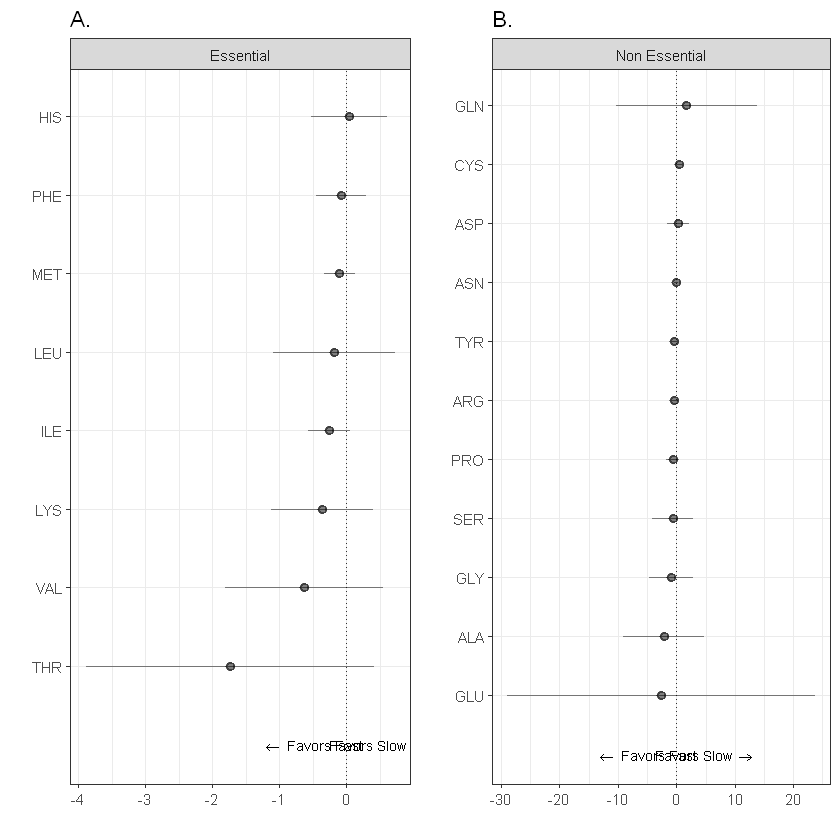

In [98]:
#png(filename="./plots/speed_mosaic_final.png", units="cm", width=40, height=20, res = 300)
grid.arrange(pspeed_E, pspeed_NE, 
            layout_matrix = rbind(c(1, 2))) 

#dev.off()

In [96]:
pE <-
    ggplot(plotdf_E, aes(x = reorder(AA, estimate), y = estimate, color = sig)) +   
        geom_hline(yintercept = 0, alpha = 0.8, linetype="dotted") +
        theme_bw() + 
        geom_pointrange(aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) +
        theme(legend.position = "none") +  
        coord_flip() + 
        facet_wrap(~type) + 
        xlab('') + ylab('') +
        ggtitle('A.') +
        annotate("text", x = 0, y = -1, label = TeX('$\\leftarrow$ Favors Girls'), size = 2) +
        annotate("text", x = 0, y = 1, label = TeX('Favors Boys $\\rightarrow$'), size = 2) +
        annotate("text", x = -1, y = -2, label = "") +
        scale_colour_grey(start = 0.5, end = 0.5)

Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"

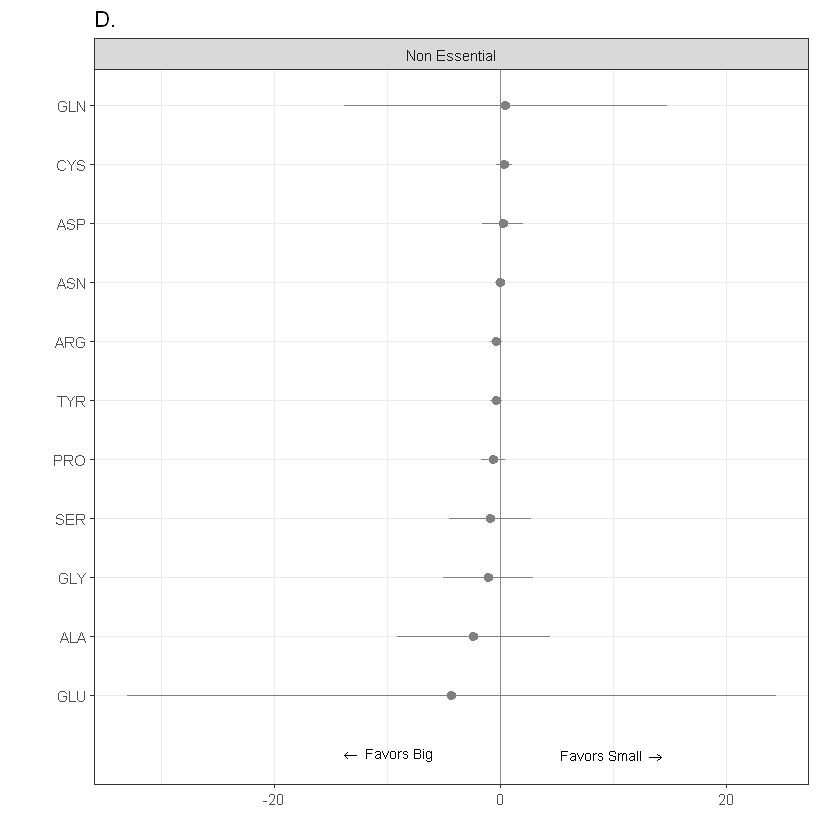

In [97]:
pstartNE <-
    ggplot(start_NE %>% mutate(type = 'Non Essential'), aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
        geom_hline(yintercept = 0, alpha = 0.4) + 
        geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
        theme_bw() +
        theme(legend.position = "none", aspect.ratio = 1) + 
        coord_flip() + 
        facet_wrap(~type) + 
        ggtitle('D.') + ylab('') + xlab('') +
            annotate("text", x = 0, y = -10, label = TeX('$\\leftarrow$ Favors Big'), size = 3) +
            annotate("text", x = 0, y = 10, label = TeX('Favors Small $\\rightarrow$'), size = 3) +
            annotate("text", x = -0.5, y = -2, label = "") + scale_colour_grey(start = 0.5, end = 0.5)
pstartNE

# Fast and Slow revisited

In [114]:
# NOT All observed:
df <- headC %>% na.omit()
headC_NO_NA <- headC %>% filter(!is.na(HeadCircumcm1) & !is.na(HCcm4))
weight_NO_NA <- weight %>% filter(!is.na(BABYWeigth1g) & !is.na(BABYWeigth4g))

headCLong_NO_NA <- headC_NO_NA %>% gather(weekNames, head, -id, -group, -sex) %>% group_by(id) %>% nest()
weightLong_NO_NA <- weight_NO_NA %>% gather(weekNames, weight, -id, -group, -sex) %>% group_by(id) %>% nest()

Warning message:
"attributes are not identical across measure variables;
they will be dropped"Warning message:
"attributes are not identical across measure variables;
they will be dropped"

In [124]:
n_HC <- dim(headCLong_NO_NA)[1]
n_W <- dim(weightLong_NO_NA)[1]

headCLong_NO_NA$data[[1]]

group,sex,weekNames,head
<fct>,<fct>,<chr>,<dbl>
teen,girl,HeadCircumcm1,34
teen,girl,HCcm2,37
teen,girl,HCcm3,39
teen,girl,HCcm4,42


In [131]:
for(i in 1:n_HC){
    headCLong_NO_NA$data[[i]] <- headCLong_NO_NA$data[[i]] %>% mutate(week = c(1, 2 ,4, 16))
}

for(i in 1:n_W){
    weightLong_NO_NA$data[[i]] <- weightLong_NO_NA$data[[i]] %>% mutate(week = c(1, 2 ,4, 16))
}


headCLong_NO_NA$data[[3]]
weightLong_NO_NA$data[[1]]

group,sex,weekNames,head,week
<fct>,<fct>,<chr>,<dbl>,<dbl>
teen,boy,HeadCircumcm1,35,1
teen,boy,HCcm2,36,2
teen,boy,HCcm3,39,4
teen,boy,HCcm4,44,16


group,sex,weekNames,weight,week
<fct>,<fct>,<chr>,<dbl>,<dbl>
teen,girl,BABYWeigth1g,3492.70,1
teen,girl,BABYWeigth2g,3592.50,2
teen,girl,BABYWeigth3g,5488.60,4
teen,girl,BABYWeigth4g,8282.74,16


In [132]:
hcMod <- function(df){
    
    mhc <- lm(head~week, data = df)
    
    return(mhc)
}

In [134]:
wMod <- function(df){
    
    mw <- lm(weight~week, data = df)
    
    return(mw)
}

In [174]:
headCLong_NO_NA <- headCLong_NO_NA %>% mutate(model = map(data, hcMod), tidy = map(model, broom::tidy))
weightLong_NO_NA <- weightLong_NO_NA %>% mutate(model = map(data, wMod), tidy = map(model, broom::tidy))

headCLong_NO_NA$model[[1]]
headCLong_NO_NA$tidy[[1]]


Call:
lm(formula = head ~ week, data = df)

Coefficients:
(Intercept)         week  
    35.5371       0.4283  


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),35.5371330,1.3343967,26.631610,0.00140698
week,0.4283247,0.1603523,2.671149,0.11622249


In [182]:
weekHC <- headCLong_NO_NA %>% select(id, tidy) %>% unnest() %>% filter(term == "week")
hc13 <- percentil(weekHC$estimate, 1/3)$value
hc23 <- percentil(weekHC$estimate, 2/3)$value

hc_coefs <-
    headCLong_NO_NA %>% select(id, tidy) %>% unnest() %>% group_by(term) %>% 
        mutate(hc13 = percentil(estimate, 1/3)$value, hc23 = percentil(estimate, 2/3)$value) %>%
        mutate(percentile = ifelse(estimate <= hc13, 'first', ifelse(estimate >= hc23, 'third', 'second'))) %>%
        filter(percentile %in% c('fisrt', 'third'))

hc_coefs

id,term,estimate,std.error,statistic,p.value,hc13,hc23,percentile
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,(Intercept),35.5371330,1.3343967,26.631610,0.0014069797,33.9810017,35.0535406,third
1,week,0.4283247,0.1603523,2.671149,0.1162224917,0.3506045,0.4283247,third
2,(Intercept),35.8134715,0.7468153,47.954925,0.0004345607,33.9810017,35.0535406,third
6,(Intercept),35.2625216,0.8628270,40.868589,0.0005981786,33.9810017,35.0535406,third
6,week,0.5630397,0.1036845,5.430317,0.0322787393,0.3506045,0.4283247,third
7,(Intercept),35.0535406,1.5005296,23.360779,0.0018274001,33.9810017,35.0535406,third
8,(Intercept),35.1381693,1.2832609,27.381937,0.0013310792,33.9810017,35.0535406,third
8,week,0.4542314,0.1542074,2.945589,0.0985164645,0.3506045,0.4283247,third
11,week,0.4573460,0.1518623,3.011584,0.2040978690,0.3506045,0.4283247,third


## Sum of branched AA

In [113]:
AA_E_Branched <- AA_E_Long %>% filter(AA %in% c('LEU', 'ILE', 'VAL', 'THR'))
AA_NE_ARG <- AA_E_Long %>% filter(AA == 'ARG')

In [115]:
AA_E_Branched_NO_NA <- AA_E_Branched %>% filter(id %in% headC_NO_NA$id)

AA_E_Branched_NO_NA <- AA_E_Branched_NO_NA %>% 
        inner_join(hc_growth %>% select(id, speed = hc_speed, start = first_hc), by = 'id') %>% 
        filter(speed != 'moderate')

head(AA_E_Branched_NO_NA)

id,group,age,sex,weekNames,level,week,AA,speed,start
<fct>,<fct>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,teen,17,girl,ILECalostrum,0,1,ILE,fast,big
2,teen,16,boy,ILECalostrum,0,1,ILE,fast,big
6,teen,16,boy,ILECalostrum,1,1,ILE,fast,big
8,teen,16,boy,ILECalostrum,1,1,ILE,fast,big
23,teen,16,boy,ILECalostrum,0,1,ILE,slow,small
30,teen,17,boy,ILECalostrum,1,1,ILE,fast,big


In [117]:
AA_E_Branched_NO_NA %>% filter(id == 1, week == 1)
AA_E_Branched_sum <- AA_E_Branched_NO_NA %>% group_by(id, week, sex, age, speed, start) %>% summarise(level = sum(level))
head(AA_E_Branched_sum)

id,group,age,sex,weekNames,level,week,AA,speed,start
<fct>,<fct>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,teen,17,girl,ILECalostrum,0,1,ILE,fast,big
1,teen,17,girl,LEUCalostrum,1,1,LEU,fast,big
1,teen,17,girl,THRCalostrum,5,1,THR,fast,big
1,teen,17,girl,VALCalostrum,2,1,VAL,fast,big


id,week,sex,age,speed,start,level
<fct>,<dbl>,<fct>,<dbl>,<chr>,<chr>,<dbl>
1,1,girl,17,fast,big,8
1,2,girl,17,fast,big,18
1,8,girl,17,fast,big,13
1,16,girl,17,fast,big,16
2,1,boy,16,fast,big,3
2,2,boy,16,fast,big,15


In [119]:
me_branched <- lmer(level ~ sex + week + speed + (1| id), data = AA_E_Branched_sum)

summary(me_branched)

Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + speed + (1 | id)
   Data: AA_E_Branched_sum

REML criterion at convergence: 302.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.06304 -0.69700 -0.03534  0.46882  2.71698 

Random effects:
 Groups   Name        Variance Std.Dev.
 id       (Intercept)  6.068   2.463   
 Residual             19.172   4.379   
Number of obs: 52, groups:  id, 14

Fixed effects:
            Estimate Std. Error t value
(Intercept)  11.1866     1.9994   5.595
sexboy        0.4602     1.9891   0.231
week          0.2047     0.1013   2.020
speedslow    -2.8183     1.8207  -1.548

Correlation of Fixed Effects:
          (Intr) sexboy week  
sexboy    -0.738              
week      -0.323  0.002       
speedslow -0.430  0.074 -0.032

In [122]:
tidy_branched <- tidy(me_branched, effects = 'fixed') 
tidy_branched

term,estimate,std.error,statistic
<chr>,<dbl>,<dbl>,<dbl>
(Intercept),11.1866295,1.9993683,5.595082
sexboy,0.4601614,1.9890875,0.231343
week,0.2046873,0.1013425,2.019758
speedslow,-2.8183401,1.8207397,-1.547909


## Predicting head circumference

In [90]:
AA_branched_Long <- 
    AA_E_Long %>% filter(AA %in% c('VAL', 'ISO', 'LEU', 'ARG')) %>% 
            group_by(id, week, age) %>% summarise(BRANCHED = sum(level, na.rm = T))

AA_significative_Long <- 
    AA_NE_Long %>% filter(AA %in% c('GLU', 'GLY', 'CYS', 'TYR')) %>% 
            group_by(id, week, age) %>% summarise(SIGNIFICATIVE = sum(level, na.rm = T))

head_pred <-
    headCLong %>% select(-weekNames) %>% inner_join(AA_branched_Long, by = c('id', 'week')) %>% 
                inner_join(AA_significative_Long, by = c('id', 'week', 'age'))

head(head_pred)

id,group,sex,head,week,age,BRANCHED,SIGNIFICATIVE
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,teen,girl,34,1,17,3,101
2,teen,boy,35,1,16,2,7
3,teen,boy,35,1,17,5,62
4,teen,boy,37,1,16,3,39
5,teen,NA,34,1,16,2,26
6,teen,boy,35,1,16,3,36


In [91]:
hc_mod <- lmer(head ~ sex + week + BRANCHED + SIGNIFICATIVE + (1 | id), data = head_pred)

lm_hc_mod <- lm(head ~ sex + week + BRANCHED + SIGNIFICATIVE, data = head_pred)


summary(lm_hc_mod)
summary(hc_mod)


Call:
lm(formula = head ~ sex + week + BRANCHED + SIGNIFICATIVE, data = head_pred)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5793 -0.9749  0.0408  0.8565  5.7974 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   33.376629   0.314135 106.249   <2e-16 ***
sexboy         0.530318   0.249093   2.129   0.0349 *  
week           0.411955   0.024168  17.046   <2e-16 ***
BRANCHED       0.013383   0.052156   0.257   0.7978    
SIGNIFICATIVE  0.003954   0.003089   1.280   0.2025    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.496 on 152 degrees of freedom
  (103 observations deleted due to missingness)
Multiple R-squared:  0.7327,	Adjusted R-squared:  0.7256 
F-statistic: 104.1 on 4 and 152 DF,  p-value: < 2.2e-16


Linear mixed model fit by REML ['lmerMod']
Formula: head ~ sex + week + BRANCHED + SIGNIFICATIVE + (1 | id)
   Data: head_pred

REML criterion at convergence: 539.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.33112 -0.55591  0.06058  0.54084  2.84294 

Random effects:
 Groups   Name        Variance Std.Dev.
 id       (Intercept) 1.269    1.1263  
 Residual             0.956    0.9778  
Number of obs: 157, groups:  id, 54

Fixed effects:
               Estimate Std. Error t value
(Intercept)   33.092113   0.334118  99.043
sexboy         0.576831   0.358635   1.608
week           0.405269   0.017402  23.289
BRANCHED       0.016609   0.040104   0.414
SIGNIFICATIVE  0.006326   0.002420   2.614

Correlation of Fixed Effects:
            (Intr) sexboy week   BRANCH
sexboy      -0.631                     
week         0.015  0.036              
BRANCHED    -0.306  0.026  0.024       
SIGNIFICATI -0.194 -0.064 -0.478 -0.501